# 1. Importing Modules

In [1]:

#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score


# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier


# Random Forest model
from sklearn.ensemble import RandomForestClassifier


# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

#XGBoost Classification model
from xgboost import XGBClassifier


#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics



#Support vector machine model
from sklearn.svm import SVC

# save XGBoost model to file
import pickle

# 2. Loading Data and checking data

In [7]:
df_1 = pd.read_csv('dataset_full.csv')
df_2 = pd.read_csv('dataset_small.csv', error_bad_lines=False)

df = df_1.merge(df_2)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_1.head()


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
df_2.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0.0,0,0,0,...,1.0,4.0,2.0,3598.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0,0,2,0,0,0.0,0,0,0,...,1.0,4.0,1.0,3977.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,1,0,0,0.0,0,0,0,...,1.0,2.0,1.0,10788.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,0,3,0,0,0.0,0,0,0,...,1.0,2.0,1.0,14339.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,0,4,0,0,0.0,0,0,0,...,1.0,2.0,1.0,389.0,1.0,1.0,0.0,0.0,0.0,1.0


In [5]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1


In [6]:

#Checking the shape of the dataset
df.shape
     

(70155, 112)

In [7]:

#Listing the features of the dataset
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [8]:
#Information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70155 entries, 0 to 70154
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 60.5 MB


# 3. Visualizing Data

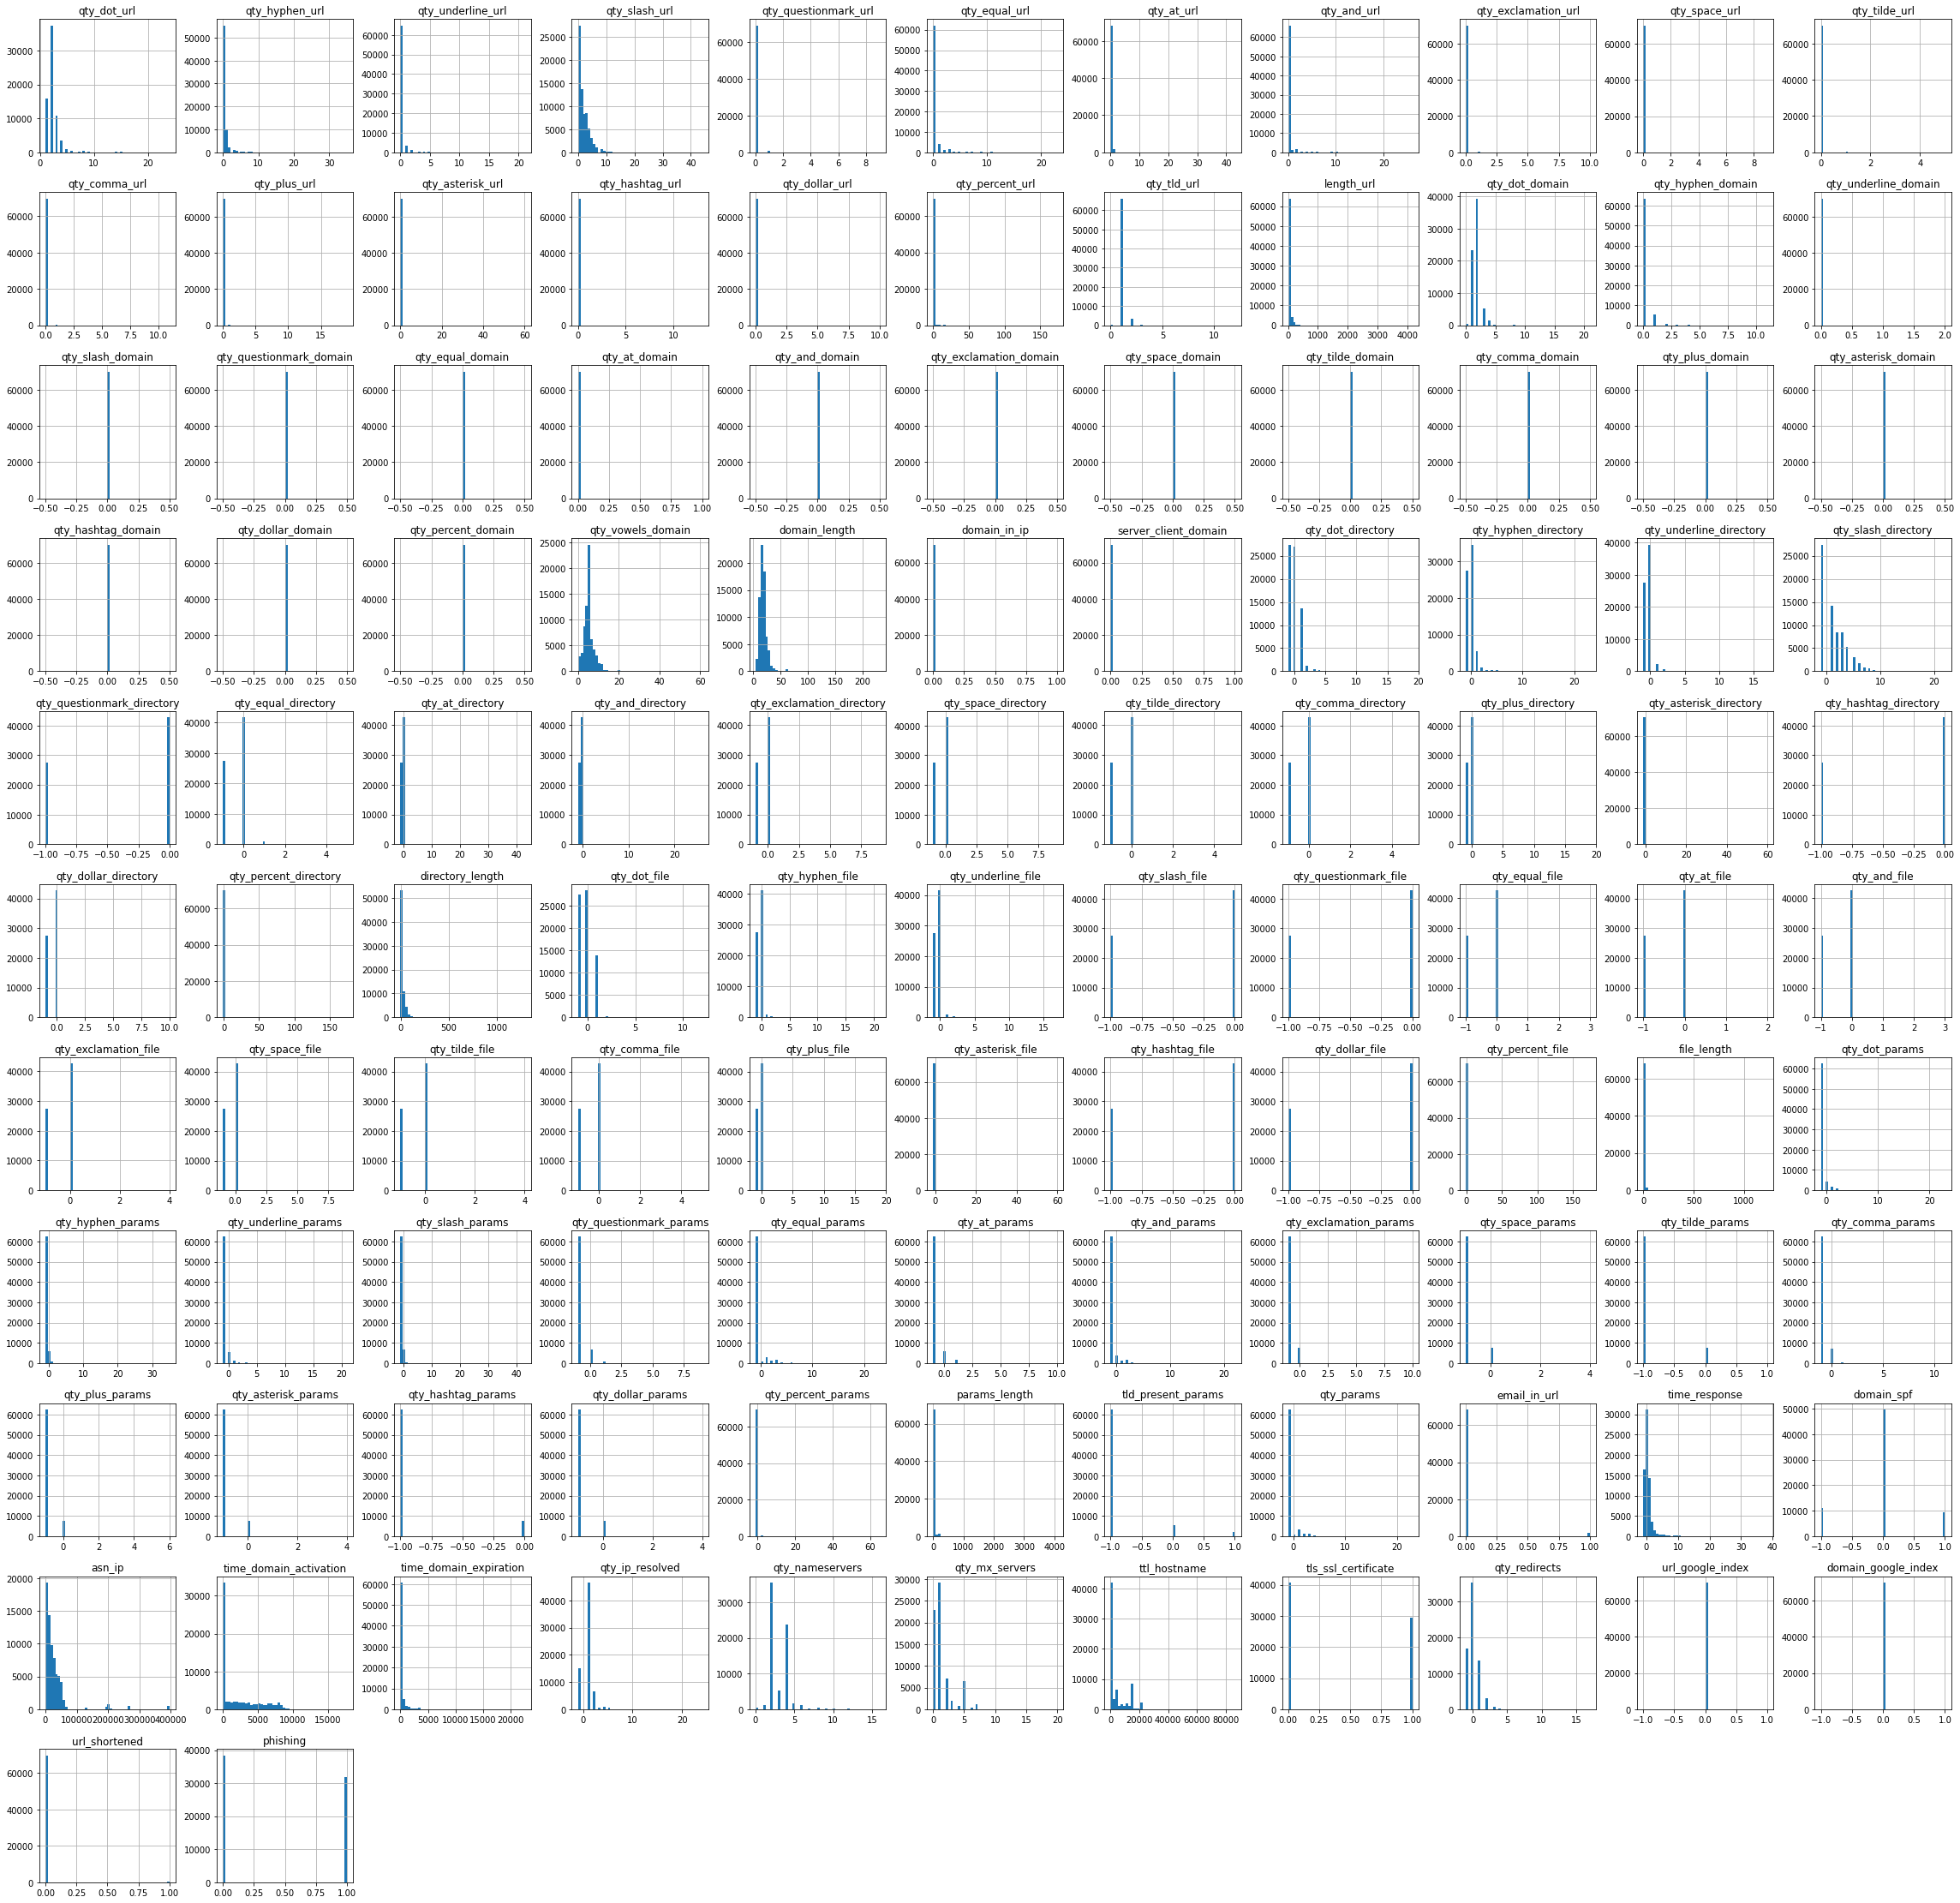

In [9]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (40,40))
plt.show()


# 4. Data Preprocessing & EDA

In [10]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,...,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000,70155.000000
mean,2.230390,0.401910,0.144865,1.717454,0.015181,0.279666,0.028252,0.186173,0.003720,0.001283,...,0.772903,2.976267,1.379417,4229.499380,0.419286,0.089587,0.001525,0.002323,0.006928,0.453239
std,1.423863,1.240661,0.740216,2.050824,0.138866,1.082434,0.314524,1.045269,0.098165,0.081666,...,1.139698,1.362370,1.686276,6758.758001,0.493446,0.888100,0.040459,0.048735,0.082944,0.497812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,525.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,6325.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data = df

In [12]:

#checking the data for null or missing values
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [13]:
# No Missing Data

 # 5. Splitting the Data

In [9]:

# Sepratating & assigning features and target columns to X & y
y = data['phishing']
X = data.drop('phishing',axis=1)
X.shape, y.shape
     

((70158, 111), (70158,))

In [11]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((56126, 111), (14032, 111))

# 6. Machine Learning Models & Training

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

<ul>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>Multilayer Perceptrons</li>
<li>XGBoost</li>
<li>Autoencoder Neural Network</li>
<li>Support Vector Machines</li>






</ul><br>

In [12]:

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## 6.1. Decision Tree Classifier
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [13]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

### Performence Evaluation : 

In [15]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.911
Decision Tree: Accuracy on test Data: 0.908


In [16]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## 6.2. Random Forest Classifier
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [17]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [18]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
     


#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.894
Random forest: Accuracy on test Data: 0.888


In [19]:

#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## 6.3. Multilayer Perceptrons (MLPs): Deep Learning
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [20]:
# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)
     

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
     
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
     

Multilayer Perceptrons: Accuracy on training Data: 0.875
Multilayer Perceptrons: Accuracy on test Data: 0.869


In [21]:

#storing the results. The below mentioned order of parameter passing is important.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## 6.4. XGBoost Classifier
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [22]:
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)
     

XGBClassifier(learning_rate=0.4, max_depth=7)

In [23]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))


#storing the results. The below mentioned order of parameter passing is important.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

XGBoost: Accuracy on training Data: 0.990
XGBoost : Accuracy on test Data: 0.966


## 6.5. Autoencoder Neural Network
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [24]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 111)]             0         
                                                                 
 dense (Dense)               (None, 111)               12432     
                                                                 
 dense_1 (Dense)             (None, 111)               12432     
                                                                 
 dense_2 (Dense)             (None, 109)               12208     
                                                                 
 dense_5 (Dense)             (None, 111)               12210     
                                                                 
 dense_6 (Dense)             (None, 111)               12432     
                                                                 
Total params: 61,714
Trainable params: 61,714
Non-trainable p

In [25]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 
     

Epoch 1/10
702/702 [==============================] - 4s 4ms/step - loss: -4651.9390 - accuracy: 0.5296 - val_loss: -4820.2363 - val_accuracy: 0.7276
Epoch 2/10
702/702 [==============================] - 2s 3ms/step - loss: -4699.5444 - accuracy: 0.7216 - val_loss: -4836.8276 - val_accuracy: 0.7259
Epoch 3/10
702/702 [==============================] - 2s 3ms/step - loss: -4708.5601 - accuracy: 0.7239 - val_loss: -4842.0918 - val_accuracy: 0.7257
Epoch 4/10
702/702 [==============================] - 3s 5ms/step - loss: -4712.3130 - accuracy: 0.7263 - val_loss: -4845.8599 - val_accuracy: 0.7352
Epoch 5/10
702/702 [==============================] - 2s 3ms/step - loss: -4715.3574 - accuracy: 0.0432 - val_loss: -4847.4561 - val_accuracy: 0.0000e+00
Epoch 6/10
702/702 [==============================] - 2s 3ms/step - loss: -4716.1055 - accuracy: 0.0000e+00 - val_loss: -4847.6514 - val_accuracy: 0.0000e+00
Epoch 7/10
702/702 [==============================] - 2s 3ms/step - loss: -4716.2451 - a

In [26]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))
     
#storing the results. The below mentioned order of parameter passing is important.

storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

439/439 [==============================] - 1s 2ms/step - loss: -4750.6606 - accuracy: 0.0000e+00

Autoencoder: Accuracy on training Data: 0.000
Autoencoder: Accuracy on test Data: 0.000


## 6.6. Support Vector Machines
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)


In [ ]:
#fit the model
svm.fit(X_train, y_train)


In [ ]:

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)



In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

#storing the results. The below mentioned order of parameter passing is important.
storeResults('SVM', acc_train_svm, acc_test_svm)

#7. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [27]:

#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.911,0.908
1,Random Forest,0.894,0.888
2,Multilayer Perceptrons,0.875,0.869
3,XGBoost,0.990,0.966
4,AutoEncoder,0.000,0.000


In [28]:

#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.990,0.966
0,Decision Tree,0.911,0.908
1,Random Forest,0.894,0.888
2,Multilayer Perceptrons,0.875,0.869
4,AutoEncoder,0.000,0.000


**From the above comparision, it is clear that the XGBoost Classifier works well with this dataset.**



In [29]:
# save XGBoost model to file
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

# Testing the saved model:


In [31]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)